## **1. Sélection de la carte GPU depuis le menu exécution**



In [1]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

## **1. Importation des librariries**

In [2]:
from IPython.display import Image, HTML, display
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.models import Model, load_model
import numpy as np
import os
import cv2 
import os
import csv
import tensorflow as tf
from keras import backend as K
from keras.backend.tensorflow_backend import set_session
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.xception import Xception, preprocess_input, decode_predictions #299*299
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions #224*224
from keras.applications.inception_v3 import InceptionV3, preprocess_input,decode_predictions# input shape= 299x299
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input,decode_predictions# input shape= 299x299
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions# input shape= 224x224 
from keras.applications.densenet import DenseNet169, preprocess_input
from keras.applications.densenet import DenseNet201, preprocess_input
from keras.applications.nasnet import NASNetLarge, preprocess_input
from keras.applications.nasnet import NASNetMobile, preprocess_input
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import math
import argparse
import matplotlib
import imghdr
import pickle as pkl
import datetime
from cycler import cycler
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from keras import utils as np_utils

Using TensorFlow backend.


## **3. Téléchargement de la base de test**

## **4. Décompression des fichiers**

In [3]:
!unzip Small2.zip

Archive:  Small2.zip
   creating: Small2/
   creating: Small2/Ciseau/
  inflating: Small2/Ciseau/0_Ciseau.png  
  inflating: Small2/Ciseau/153_Ciseau.png  
  inflating: Small2/Ciseau/243_Ciseau.png  
  inflating: Small2/Ciseau/297_Ciseau.png  
  inflating: Small2/Ciseau/351_Ciseau.png  
  inflating: Small2/Ciseau/414_Ciseau.png  
  inflating: Small2/Ciseau/459_Ciseau.png  
  inflating: Small2/Ciseau/504_Ciseau.png  
  inflating: Small2/Ciseau/522_Ciseau.png  
  inflating: Small2/Ciseau/540_Ciseau.png  
  inflating: Small2/Ciseau/609_Ciseau.png  
  inflating: Small2/Ciseau/627_Ciseau.png  
  inflating: Small2/Ciseau/644_Ciseau.png  
  inflating: Small2/Ciseau/654_Ciseau.png  
  inflating: Small2/Ciseau/855_Ciseau.png  
  inflating: Small2/Ciseau/882_Ciseau.png  
  inflating: Small2/Ciseau/909_Ciseau.png  
  inflating: Small2/Ciseau/90_Ciseau.png  
  inflating: Small2/Ciseau/936_Ciseau.png  
  inflating: Small2/Ciseau/954_Ciseau.png  
   creating: Small2/Papier/
  inflating: Small2/Papie

## **5. Fonction de récupération des images et labels**

In [0]:
def generate_from_paths_and_labels(input_paths, labels, batch_size, input_size=(299,299)):

    num_samples = len(input_paths)
    while 1:
        perm = np.random.permutation(num_samples)
        input_paths = input_paths[perm]
        labels = labels[perm]
        for i in range(0, num_samples, batch_size):
            inputs = list(map(
                lambda x: image.load_img(x, target_size=input_size),
                input_paths[i:i+batch_size]
            ))
            inputs = np.array(list(map(
                lambda x: image.img_to_array(x),
                inputs
            )))
            inputs = preprocess_input(inputs)
            yield (inputs, labels[i:i+batch_size])

## **6. Définition des noms de classes dans "classes.txt"**

In [5]:
ls

model1.h5  sample_data/  Small2/  Small2.zip


In [0]:
!printf '%s\n' 'Ciseau' 'Papier' 'Pierre'> classes.txt

In [7]:
ls

classes.txt  model1.h5  sample_data/  Small2/  Small2.zip


## **7. Définition des modèles à tester et chemin de la base de test (Attention: le modèle doit être importé sur Colab avant)"** 

In [10]:
from keras.models import load_model
from tensorflow import keras
model_path="model1.h5"
classes_path = "classes.txt"
dataset_test="Small2"         
top_n=3

import tensorflow as tf 
model = tf.keras.models.load_model(model_path)

#model = load_model(model_path)

## **8. Récupérer les images de test et leurs labels**

In [0]:
import os
from keras import utils as np_utils

# Récupurer les noms des classes
with open(classes_path, 'r') as f:
    classes = f.readlines()
    classes = list(map(lambda x: x.strip(), classes))
num_classes = len(classes)

# Récupurer les images et les classes
test_paths, test_labels = [], []
for class_name in os.listdir(dataset_test):
    class_path = os.path.join(dataset_test, class_name)
    class_id = classes.index(class_name)
    for path in os.listdir(class_path):
        path = os.path.join(class_path, path)
        if imghdr.what(path) == None:
            # this is not an image file
            continue
        test_paths.append(path)
        test_labels.append(class_id)

test_labels=np_utils.to_categorical(test_labels,num_classes)
test_paths = np.array(test_paths)

## **9. Evaluer le modèle avec les données de test**

In [12]:
score = model.evaluate_generator(
    generate_from_paths_and_labels(
      input_paths=test_paths, 
      labels=test_labels,
      batch_size=8,
      input_size=(224,224,3)),
    steps=(len(test_paths)/8),workers = 1)

print (len(test_paths))

#print(score[1])
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

60
loss: 0.00%
acc: 100.00%


Top 1 ====================
Class name: Ciseau
Probability: 100.00%
Top 2 ====================
Class name: Papier
Probability: 0.00%
Top 3 ====================
Class name: Pierre
Probability: 0.00%


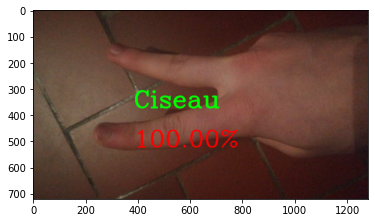

In [17]:
%matplotlib inline
image_path='Small2//Ciseau//882_Ciseau.png'                # Votre image de test
#image_path='Small2//Papier//585_Papier.png'                # Votre image de test
#image_path='Small2//Pierre//443_Pierre.png'                # Votre image de test   
top_n=3
model = load_model(model_path)

# load class names
classes = []
with open(classes_path, 'r') as f:
    classes = list(map(lambda x: x.strip(), f.readlines()))

img = image.load_img(image_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# predict
pred = model.predict(x)[0]
result = [(classes[i], float(pred[i]) * 100.0) for i in range(len(pred))]
result.sort(reverse=True, key=lambda x: x[1])

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX 

for i in range(top_n):
    (class_name, prob) = result[i]
    textsize = cv2.getTextSize(class_name, font, 1, 2)[0]
    textX = (img.shape[1] - textsize[0]) / 2
    textY = (img.shape[0] + textsize[1]) / 2
    if (i == 0) :
        cv2.putText(img, class_name, (int(textX)-200, int(textY)), font, 3, (0,255,0), 6, cv2.LINE_AA)
        cv2.putText(img,  "%.2f%%" % (float(prob)), (int(textX)-200, int(textY+150)), font, 3, (255,0,0), 3, cv2.LINE_AA)
    print("Top %d ====================" % (i + 1))
    print("Class name: %s" % (class_name))
    print("Probability: %.2f%%" % (prob))
plt.imshow(img)
plt.show()

In [0]:
ls

 classes.txt                     Sidi_classification_VGG16.h5
 modified_InceptionResNetV2.h5  'Test data'/
 modified_MobileNet.h5           Test.zip
 sample_data/                    VGG16_covid_fine_ep12_valloss0.083.h5
